# Odev 3

### Ön Çalışma

In [9]:
"""
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as sig

%matplotlib notebook

w_cont = np.arange(0, 2*np.pi, np.pi/1000)
X_abs  = np.abs(2*np.cos(w_cont/2))
X_phase = np.array([-w/2 if w < np.pi else -w/2+np.pi for w in w_cont])

plt.subplot(1,2,1)
plt.plot(w_cont/np.pi, X_abs)
plt.title('$|X(e^{j\omega})|$')
plt.xlabel('Normalize frekans (x$\pi$)')

plt.subplot(122)
plt.plot(w_cont/np.pi,X_phase/np.pi)
plt.title('$ \measuredangle X(e^{j\omega})$')
plt.xlabel('Normalize frekans (x$\pi$)')

def dirac(n):
    if n == 0:
        return 1
    else:
        return 0
    
N = 8
X_k = np.zeros([N], dtype = complex)

for k in range(N):
    for n in range(N):
        X_k[k] = X_k[k] + (dirac(n) + dirac(n-1))*np.exp(-1j*(2*np.pi/N)*k*n)
        
X_k_abs = np.abs(X_k)
X_k_phase = np.angle(X_k)

plt.figure()
plt.subplot(1, 2, 1)
plt.plot(w_cont/np.pi, X_abs, label = '$|X(e^{j\omega})|$')
w_discrete = np.arange(0, N) * (2*np.pi/N)
plt.stem(w_discrete/np.pi, X_k_abs, 'r-', label = '$|X[k]|$',markerfmt='ro')
plt.xlabel('$\omega$ (x$\pi$)')
plt.legend()


plt.subplot(1, 2, 2)
plt.plot(w_cont/np.pi, X_phase, label ='$ \measuredangle X(e^{j\omega})$')
plt.stem(w_discrete/np.pi,X_k_phase,'r-',label='$ \measuredangle X[k]$',markerfmt='ro')
plt.xlabel('$\omega$ (x$\pi$)')
plt.legend()

from scipy.fftpack import fft, ifft

x = np.array([1, 1])
fft_X = fft(x, 8)
abs_fft_X = np.abs(fft_X)
phase_fft_X = np.angle(fft_X)

## Grafik çizimi
plt.figure()
plt.subplot(121)
plt.plot(w_cont/np.pi,X_abs,label='$|X(e^{j\omega})|$')
w_discrete=np.arange(0,N)*(2*np.pi/N)
plt.stem(w_discrete/np.pi,abs_fft_X,'ro-',label='$|X[k]|-fft() ile$')
plt.xlabel('$\omega$ (x$\pi$)')
plt.legend(loc='upper right')

plt.subplot(122)
plt.plot(w_cont/np.pi,X_phase,label='$ \measuredangle X(e^{j\omega})$')
plt.stem(w_discrete/np.pi,phase_fft_X,'ro-',label='$ \measuredangle X[k]-fft() ile$')
plt.xlabel('$\omega$ (x$\pi$)')
plt.legend(loc='upper right')

#Frekansta örnekleme zamanda periyodiklik ilişkisi

#10 uzunluklu versiyon
n1=np.arange(0,10)
x1=np.cos(3*np.pi/5*n1)
X1_abs=np.abs(fft(x1))
w_disc_1=n1*2*np.pi/len(n1) #0-2pi arası 2pi/10 adımlı vektör (2pi noktası dahil değil)
plt.figure()
plt.subplot(121)
plt.stem(w_disc_1/np.pi,X1_abs)
plt.xlabel('$\omega (x\pi)$')
plt.title('$cos(\\frac{3\\pi}{5}n)$ 10 uzunluklu DFT')

#15 uzunluklu versiyon
n2=np.arange(0,15)
x2=np.cos(3*np.pi/5*n2)
X2_abs=np.abs(fft(x2))
w_disc_2=n2*2*np.pi/len(n2) #0-2pi arası 2pi/15 adımlı vektör (2pi noktası dahil değil)
plt.subplot(122)
plt.stem(w_disc_2/np.pi,X2_abs)
plt.xlabel('$\omega (x\pi)$')
plt.title('$cos(\\frac{3\\pi}{5}n)$ 15 uzunluklu DFT')

x=np.array([0,2,0,-2])
N=len(x)
n=np.arange(0,4)
w_disc=n*2*np.pi/N # 0-2pi arasında(2pi noktası dahil değil) 2pi/4 adımlı vektör 
X_abs=np.abs(fft(x)/N)
X_phase=np.angle(fft(x)/N)

plt.figure()
plt.subplot(121)
plt.stem(w_disc/np.pi,X_abs)
plt.xlabel('$\omega (\\times \pi)$')
plt.title('$\\frac{1}{N}|X(e^{j\omega})|=|a_{k}|$')
plt.subplot(122)

plt.stem(w_disc/np.pi,X_phase/np.pi)
plt.xlabel('$\omega (\\times \pi)$')
plt.title('$\\frac{1}{N}\measuredangle X(e^{j\omega})(\\times \pi)=\measuredangle a_k(\\times \pi)$')

# Basamak, Dürtü İşaretlerinin Kolayca Oluşturulması
#u[n]
n = np.arange(-20,21)
#yol-1
u_n = np.array([0 if i < 0 else 1 for i in n]) 
#yol-2
u_n = []
for i in n:
    if i<0:
        u_n.append(0)
    else:
        u_n.append(1)
#yol-3(bu yol önerilmemektedir)
u_n = np.concatenate((np.zeros(20),np.ones(21)))
#yol-4
u_n=np.ones(len(n))
u_n[n<0]=0
plt.figure()
plt.stem(n, u_n)

#u[n-3]
n= np.arange(-20,21)
u_n_3 = np.array([0 if i<3 else 1 for i in n])
plt.figure()
plt.stem(n, u_n_3)

#dirac[n]
n= np.arange(-20,21)
dirac_n = np.array([0 if i!=0 else 1 for i in n])
plt.figure()
plt.stem(n, dirac_n)

#dirac[n+2]
n = np.arange(-20, 21)
dirac_n_arti_2 = np.array([0 if i!=2 else 1 for i in n])
plt.figure()
plt.stem(n, dirac_n_arti_2)

#u[n] - u[n-10]
n = np.arange(-20, 21)
u_n_eksi_u_n_10 = np.array([1 if i>=0 and i<= 10 else 0 for i in n])
plt.figure()
plt.stem(n, u_n_eksi_u_n_10)
"""



"\nimport numpy as np\nimport matplotlib.pyplot as plt\nimport scipy.signal as sig\n\n%matplotlib notebook\n\nw_cont = np.arange(0, 2*np.pi, np.pi/1000)\nX_abs  = np.abs(2*np.cos(w_cont/2))\nX_phase = np.array([-w/2 if w < np.pi else -w/2+np.pi for w in w_cont])\n\nplt.subplot(1,2,1)\nplt.plot(w_cont/np.pi, X_abs)\nplt.title('$|X(e^{j\\omega})|$')\nplt.xlabel('Normalize frekans (x$\\pi$)')\n\nplt.subplot(122)\nplt.plot(w_cont/np.pi,X_phase/np.pi)\nplt.title('$ \\measuredangle X(e^{j\\omega})$')\nplt.xlabel('Normalize frekans (x$\\pi$)')\n\ndef dirac(n):\n    if n == 0:\n        return 1\n    else:\n        return 0\n    \nN = 8\nX_k = np.zeros([N], dtype = complex)\n\nfor k in range(N):\n    for n in range(N):\n        X_k[k] = X_k[k] + (dirac(n) + dirac(n-1))*np.exp(-1j*(2*np.pi/N)*k*n)\n        \nX_k_abs = np.abs(X_k)\nX_k_phase = np.angle(X_k)\n\nplt.figure()\nplt.subplot(1, 2, 1)\nplt.plot(w_cont/np.pi, X_abs, label = '$|X(e^{j\\omega})|$')\nw_discrete = np.arange(0, N) * (2*np.pi/

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as sig
from scipy.fftpack import fft, ifft

%matplotlib notebook

# Ödev 3 Sorular

## Soru-1 h[n] = dirac[n] - dirac[n-1]

### a)
#### H(e^(jw) ) =  ∑h[n-k]*e^(-jwk) -> 0 ve 1 değerleri haricinde sıfır olur bu nedenle
#### H(e^(jw) ) =  (0dan 1 e)∑e^(-jwk)  
####                  =  1- e^(-jw)
####                  =  1- e^(-jw) ifadesini 2je^(-jw/2) parantezine alalım

####                  =  2je^(-jw/2)((e^(jw/2) - e^(jw/2))/2j)
####                  = 2je^(-jw/2) sin(w/2)

####                  

<IPython.core.display.Javascript object>


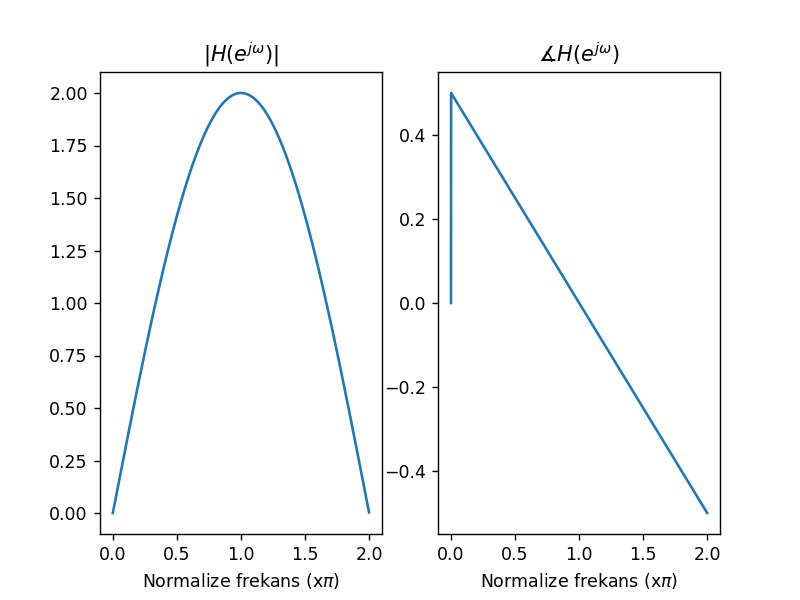

Text(0.5, 0, 'Normalize frekans (x$\\pi$)')

In [11]:
w_cont = np.arange(0, 2*np.pi, np.pi/1000)
h = 2j*np.exp(-1j*w_cont/2)*np.sin(w_cont/2)
h_abs = np.abs(h)
h_phase = np.angle(h)


plt.figure()
plt.subplot(1, 2, 1)
plt.plot(w_cont/np.pi, h_abs)
plt.title('$|H(e^{j\omega})|$')
plt.xlabel('Normalize frekans (x$\pi$)')

plt.subplot(1, 2, 2)
plt.plot(w_cont/np.pi, h_phase/np.pi)
plt.title('$ \measuredangle H(e^{j\omega})$')
plt.xlabel('Normalize frekans (x$\pi$)')

### b-) $|H(e^{j\omega})|$ bir yüksek geçiren filtredir

### c)h[n] işaretinin n=0, ..., 15 indislerinde tanımlı 16 noktalı şekilde oluştur ve fft() fonksiyonu ile 16 noktalı DFT'sinin genlik ve faz grafiklerini çizdir.

<IPython.core.display.Javascript object>


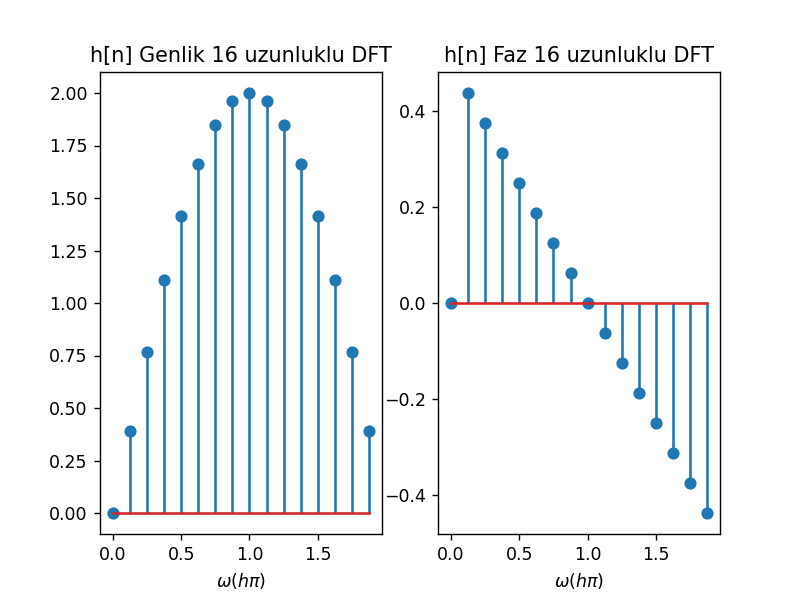

Text(0.5, 1.0, 'h[n] Faz 16 uzunluklu DFT')

In [12]:
n1 = np.arange(0, 16)
dirac_n = np.array([0 if i!=0 else 1 for i in n1])
dirac_n_eksi_1 = np.array([0 if i!=1 else 1 for i in n1])

h = dirac_n - dirac_n_eksi_1
h_abs = np.abs(fft(h))
h_phase = np.angle(fft(h))
w_disc= n1*2*np.pi/len(n1)
plt.figure()
plt.subplot(1, 2, 1)
plt.stem(w_disc/np.pi ,h_abs)
plt.xlabel('$\omega (h\pi)$')
plt.title('h[n] Genlik 16 uzunluklu DFT')
plt.subplot(1, 2, 2)
plt.stem(w_disc/np.pi ,h_phase/np.pi)
plt.xlabel('$\omega (h\pi)$')
plt.title('h[n] Faz 16 uzunluklu DFT')